# Bubble detector

Bubble detector is a simple model to detect Bubble in an image. In this case, the model is fine-tuned for detecting Bubble inside a comic/manga page.

This notebook will show you how to use the `BubbleDetector` modules and plot the returned outputs.

## 1. Import

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from mltranslator import PROJECT_DIR
from mltranslator.modules.detection import BubbleDetector

## 2. Setup

Create a `BubbleDetector` model and load in an image for testing.

In [10]:
# model_path = os.path.join(PROJECT_DIR, "mltranslator/models/detection/best.pt")
Bubble_detector = BubbleDetector(
    # use parameter below to load custom model
    # yolo_model_path=model_path
)

In [11]:
# You can modify the path below
image_path = f"{PROJECT_DIR}/dataset/test/test2.jpg"
image = Image.open(image_path).convert("RGB")

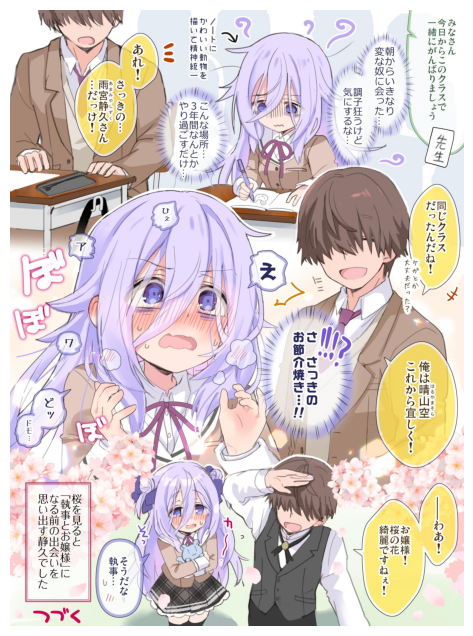

In [12]:
# show image original image
fig, _ = plt.subplots(1,1, figsize=(8,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
plt.show()

## 3. Result

In [13]:
debug_image, cropped_images = Bubble_detector.get_output_and_cropped_images(image)
result_api = Bubble_detector.get_detect_output_api(image)

tensor([0.9259, 0.8955, 0.8645, 0.8586, 0.8568, 0.7932, 0.7757, 0.7258, 0.7006, 0.4657, 0.3838, 0.2899, 0.2404, 0.2136, 0.1491])
tensor([0.9259, 0.8955, 0.8645, 0.8586, 0.8568, 0.7932, 0.7757, 0.7258, 0.7006, 0.4657, 0.3838, 0.2899, 0.2404, 0.2136, 0.1491])


The `result_api` contains the output of the BubbleDetector model `(x_min, y_min, x_max, y_max)`

In [14]:
# show bounding box result
display(result_api)

[(2003, 0, 2297, 709),
 (1789, 129, 1997, 609),
 (319, 217, 637, 752),
 (1630, 285, 1855, 760),
 (2089, 579, 2247, 811),
 (2012, 872, 2286, 1416),
 (714, 966, 851, 1108),
 (1315, 1520, 1716, 2136),
 (1848, 1673, 2264, 2324),
 (110, 1912, 282, 2123),
 (19, 2019, 160, 2222),
 (78, 2395, 397, 3006),
 (2068, 2395, 2264, 2818),
 (1767, 2473, 2100, 3077),
 (431, 2680, 659, 3083)]

In [19]:
result_api[2]

(319, 217, 637, 752)

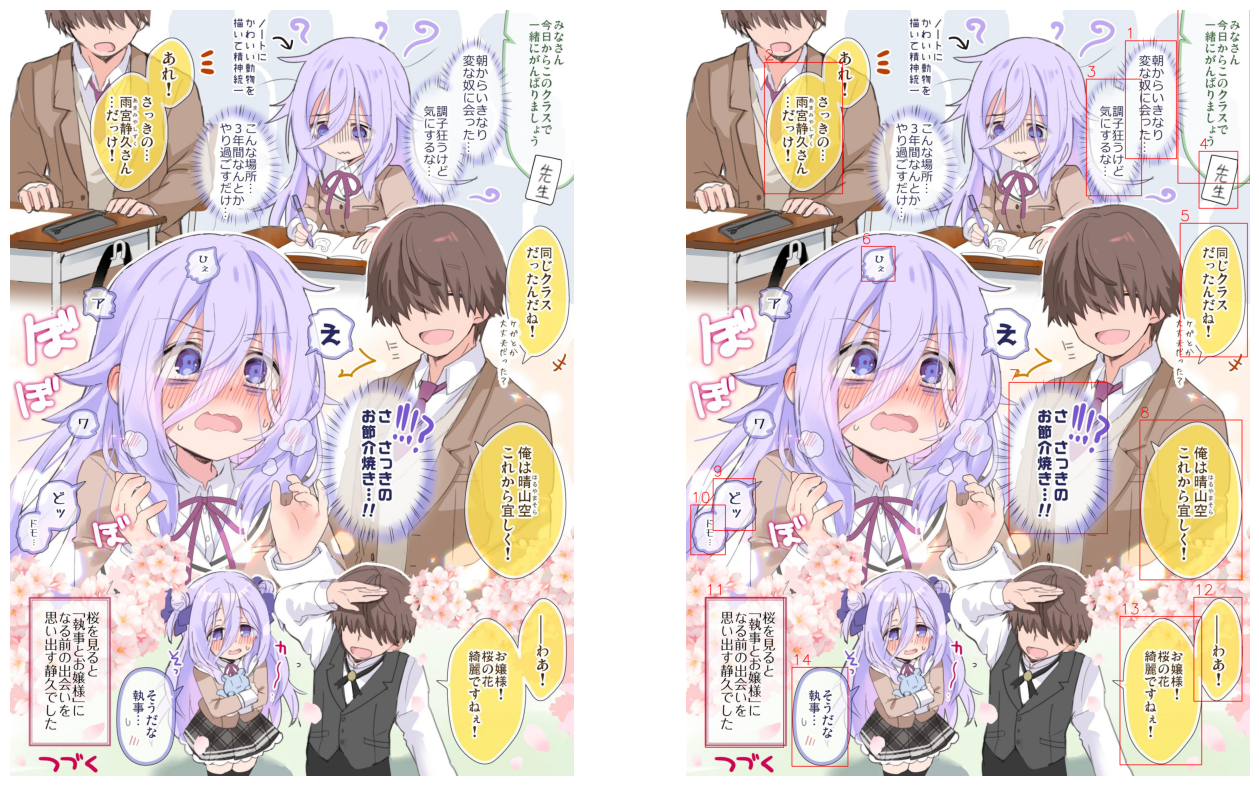

In [18]:
# show detected image and original image side by side
fig, _ = plt.subplots(1,2, figsize=(16,16))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[1].imshow(debug_image)
fig.axes[1].axis("off")
plt.show()

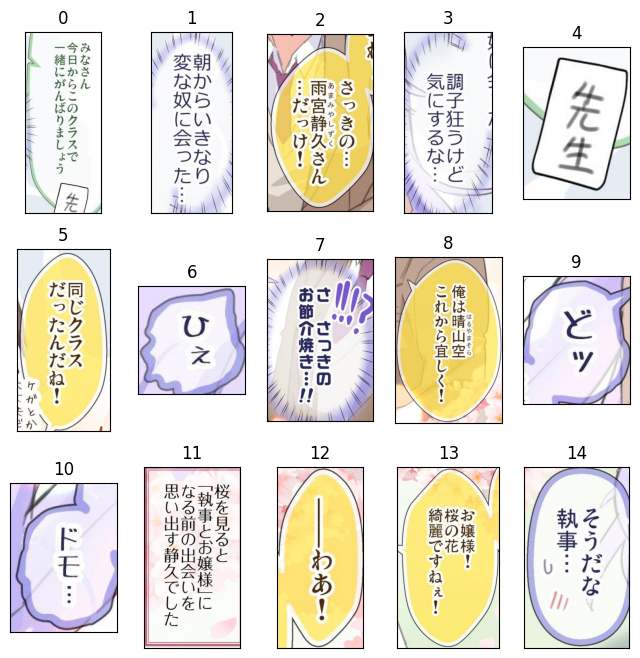

In [17]:
# plot all the cropped images
r = int(np.sqrt(len(cropped_images)))
c = int(np.round(len(cropped_images)/r))
fig, _ = plt.subplots(r,c, figsize=(8,8))
for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if i >= len(cropped_images):
        ax.axis("off")
        continue
    ax.set_title(i)
    ax.imshow(cropped_images[i])

    
plt.show()